# 1. Import necessary libraries

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

from tensorflow.keras.models import Sequential

import numpy as np

import matplotlib.pyplot as plt

import os

from keras.preprocessing import image

# 2. Load Dataset

In [3]:
path1 = 'D:\gc_D\Dataset'

train_images = sorted(os.listdir(path1))

train_image = []

for im in train_images:
    img = image.load_img('D:\gc_D\Dataset/'+ im, target_size=(64,64), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    
train_df = np.array(train_image)


In [4]:
train_df.shape


(120, 64, 64, 1)

# 3. plot clean images

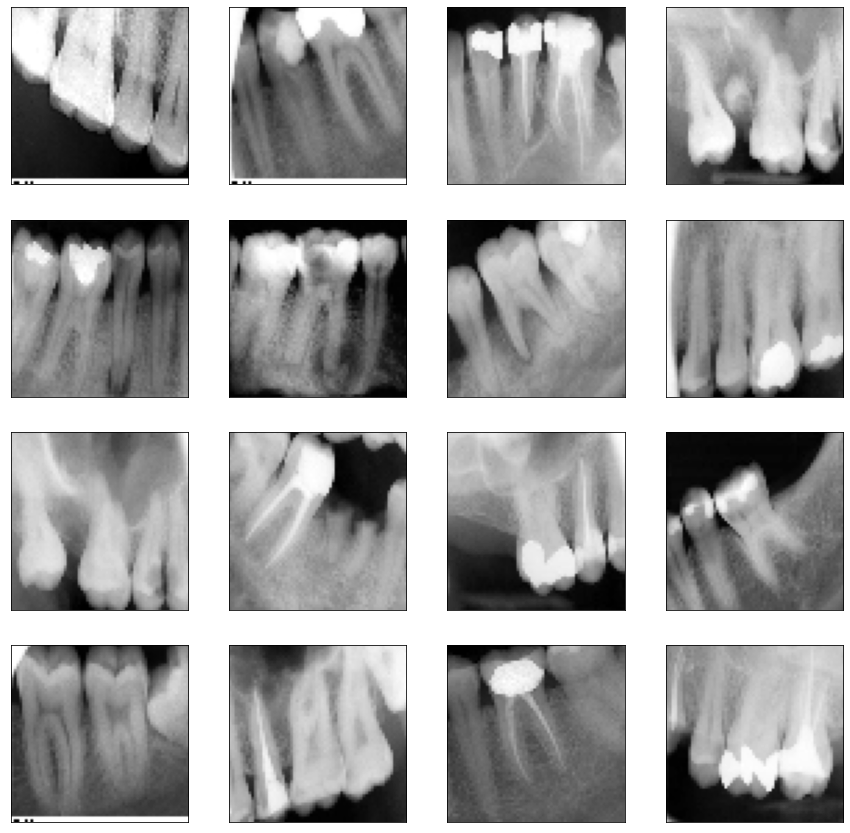

In [5]:
fig, axes = plt.subplots(4,4, figsize=(15,15), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
        ax.imshow(train_df[i], cmap='gray')
        
plt.show()


# 4. Add noise

In [6]:
noised_df= []

def add_noice(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.07
    return noisy


for img in train_df:
    noisy= add_noice(img)
    noised_df.append(noisy)
    
noised_df= np.array(noised_df)


In [7]:
noised_df.shape


(120, 64, 64, 1)

# 5. plot noised images

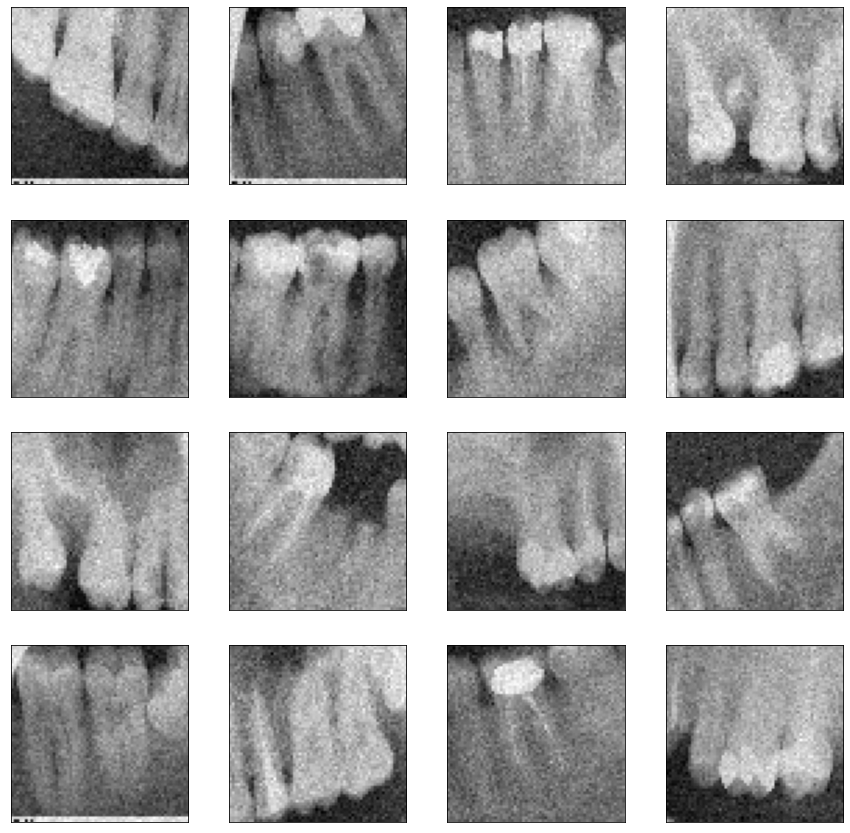

In [8]:
fig, axes = plt.subplots(4,4, figsize=(15,15), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
        ax.imshow(noised_df[i], cmap='gray')
        
plt.show()


# 6. create model and compile

In [9]:

model = Sequential()


model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))

model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(MaxPooling2D((2, 2), padding='same'))

     
    
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))

model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))


model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 up_sampling2d (UpSampling2  (None, 32, 32, 128)       0

# 7. split data in training and testing sets

In [10]:
xtrain=noised_df[0:100]

ytrain=train_df[0:100]

xtest=noised_df[100:]

ytest=train_df[100:]


# 8. train the model

In [11]:

model.fit(xtrain, ytrain, epochs=40, batch_size=10, shuffle=True,validation_data=(xtest, ytest))


Epoch 1/40
10/10 [==============================] - 3s 229ms/step - loss: 0.1038 - val_loss: 0.0572
Epoch 2/40
10/10 [==============================] - 2s 244ms/step - loss: 0.0384 - val_loss: 0.0228
Epoch 3/40
10/10 [==============================] - 3s 262ms/step - loss: 0.0187 - val_loss: 0.0125
Epoch 4/40
10/10 [==============================] - 2s 220ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 5/40
10/10 [==============================] - 2s 236ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 6/40
10/10 [==============================] - 2s 222ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 7/40
10/10 [==============================] - 2s 219ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 8/40
10/10 [==============================] - 2s 214ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 9/40
10/10 [==============================] - 2s 213ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 10/40
10/10 [==============================] - 2s 224ms/step - loss: 0.0040 - val_loss: 0.0036

# 9. predict data

In [12]:

no_noise_img = model.predict(xtest)


1/1 [==============================] - 0s 198ms/step


# 10. plot original,noised and and predicted image

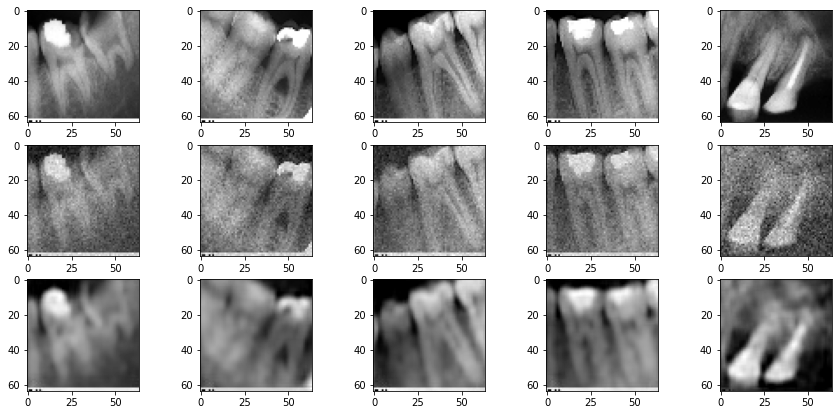

In [13]:
f, ax = plt.subplots(3, 5)

f.set_size_inches(15,7)

for i in range(5):
        ax[0][i].imshow(np.reshape(train_df[i+100], (64,64)),cmap='gray')
        ax[1][i].imshow(np.reshape(noised_df[i+100], (64,64)), cmap='gray')
        ax[2][i].imshow(np.reshape(no_noise_img[i], (64,64)),cmap='gray')
        